# HCDS A2: Bias in data

Installing certain libraries to be used in this notebook

In [ ]:
pip install nltk

In [ ]:
pip install wordcloud

Importing all libraries to be used in this analysis

In [1]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import requests 

Downloading certain modules from NLTK to be used later

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**For the purpose of this analysis, I chose Wikipedia comments labeled as showing:**
**1. Aggression**
**2. Toxicity**


We first download the two datasets using the function below:

In [3]:
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
            

download_url('https://ndownloader.figshare.com/articles/4267550/versions/5', 'Aggression.zip')
zip = ZipFile('Aggression.zip')
zip.extractall('Aggression')

download_url('https://ndownloader.figshare.com/articles/4563973/versions/2', 'Toxicity.zip')
zip = ZipFile('Toxicity.zip')
zip.extractall('Toxicity')

Now we read the csv (or tsv here) files that we extracted from the archives

In [4]:
agg_df_ann = pd.read_csv("Aggression/aggression_annotations.tsv", sep='\t')
tox_df_ann = pd.read_csv("Toxicity/toxicity_annotations.tsv", sep='\t')

agg_df_com = pd.read_csv("Aggression/aggression_annotated_comments.tsv", sep='\t')
tox_df_com = pd.read_csv("Toxicity/toxicity_annotated_comments.tsv", sep='\t')

agg_df_dem = pd.read_csv("Aggression/aggression_worker_demographics.tsv", sep='\t')
tox_df_dem = pd.read_csv("Toxicity/toxicity_worker_demographics.tsv", sep='\t')

We have loaded the csv files into Pandas dataframes, and we are all set for our analysis! 

## Question 1: 
### How well does the demographic profile of the crowdworkers match that of the general population?

Let us analyse the demographic traits of the crowdworkers across multiple features:

### Demographic analysis for Aggressive comments

#### Gender

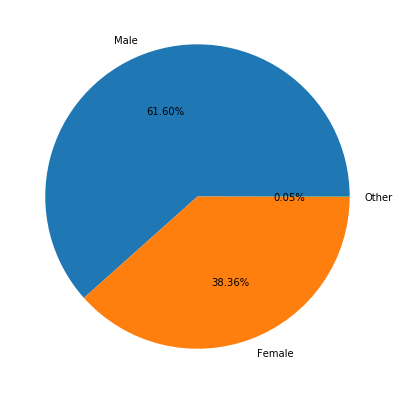

In [5]:
fig = plt.figure(figsize =(10, 7))
plt.pie(agg_df_dem['gender'].value_counts(), labels = ['Male', 'Female', 'Other'], autopct='%1.2f%%')
plt.show() 

#### Is English their first language?

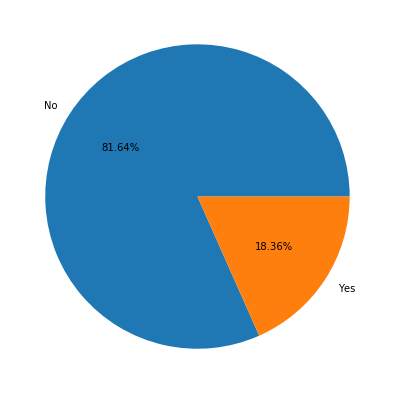

In [6]:
fig = plt.figure(figsize =(10, 7))
plt.pie(agg_df_dem['english_first_language'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%')
# show plot 
plt.show() 

#### Age

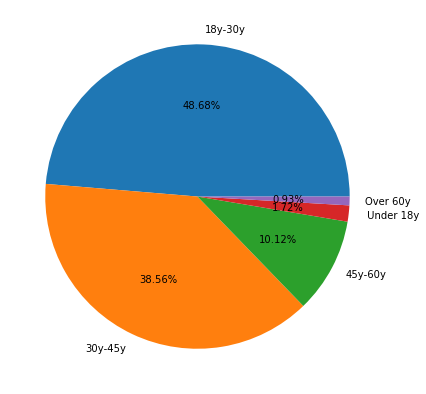

In [7]:
fig = plt.figure(figsize =(10, 7))
plt.pie(agg_df_dem['age_group'].value_counts(), labels = ['18y-30y', '30y-45y', '45y-60y', ' Under 18y', 'Over 60y'], autopct='%1.2f%%')
# show plot 
plt.show() 

#### Education

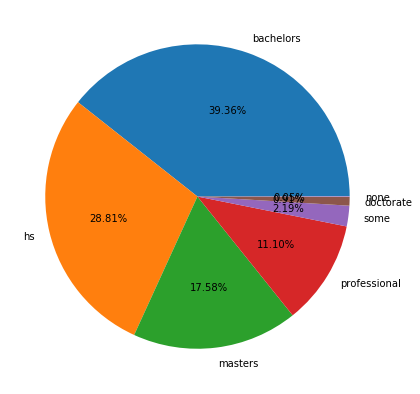

In [8]:
fig = plt.figure(figsize =(10, 7))
plt.pie(agg_df_dem['education'].value_counts(), labels = ['bachelors', 'hs', 'masters', 'professional', 'some', 'doctorate', 'none'], autopct='%1.2f%%')
# show plot 
plt.show() 

### Demographic analysis for Toxic comments

#### Gender

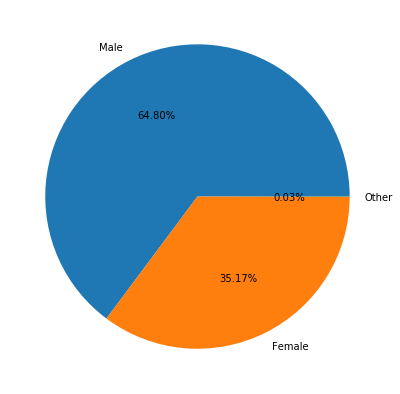

In [9]:
fig = plt.figure(figsize =(10, 7))
plt.pie(tox_df_dem['gender'].value_counts(), labels = ['Male', 'Female', 'Other'], autopct='%1.2f%%') 
plt.show() 

#### Is English their first language?

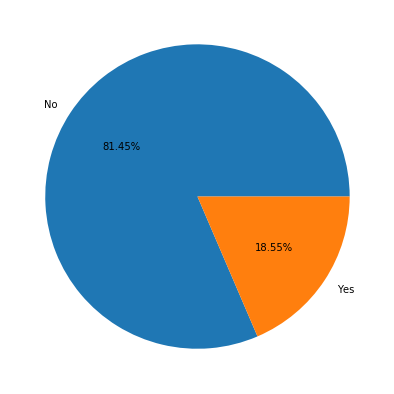

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.pie(tox_df_dem['english_first_language'].value_counts(), labels = ['No', 'Yes'], autopct='%1.2f%%') 
plt.show() 

#### Age

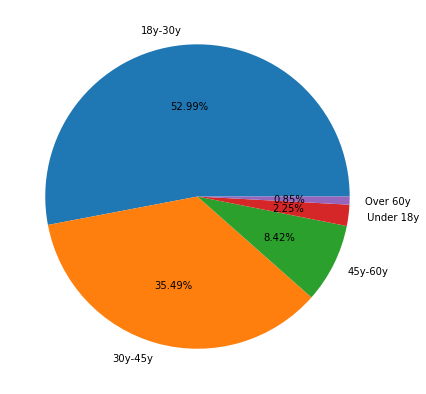

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.pie(tox_df_dem['age_group'].value_counts(), labels = ['18y-30y', '30y-45y', '45y-60y', ' Under 18y', 'Over 60y'], autopct='%1.2f%%')
plt.show() 

#### Education

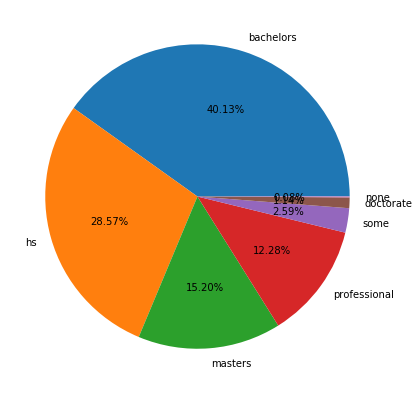

In [12]:
fig = plt.figure(figsize =(10, 7))
plt.pie(tox_df_dem['education'].value_counts(), labels = ['bachelors', 'hs', 'masters', 'professional', 'some', 'doctorate', 'none'], autopct='%1.2f%%')
plt.show() 

## Question 2: 
### Are certain words more likely to be associated with comments labelled as aggressive speech and toxic speech? 

Let us analyse the most common words in aggressive and toxic comments and compare them with comments without toxicity/aggression

In [13]:
tox_df_all = tox_df_com.merge(tox_df_ann, on='rev_id')
agg_df_all = agg_df_com.merge(agg_df_ann, on='rev_id')
stop_words = set(stopwords.words('english')) 

### Word Cloud analysis for Toxic Speech

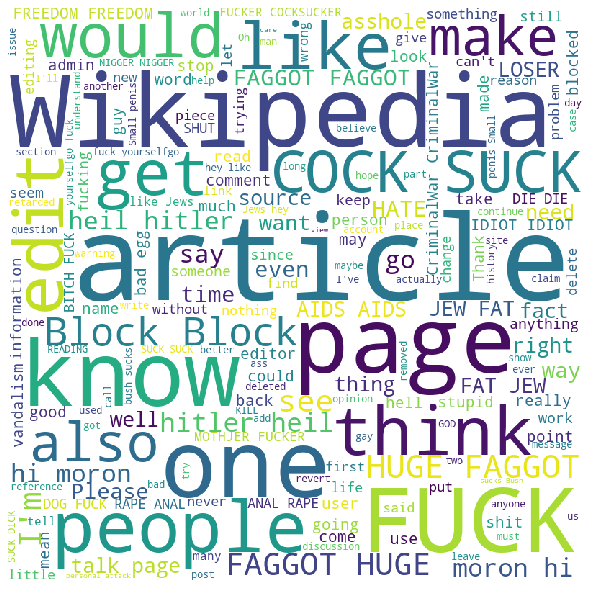

In [14]:
tox_comm = tox_df_all[tox_df_all['toxicity'] == 1]['comment'].sample(frac = 1) 
all_comm_tox = ''
for i in range(10000):
    all_comm_tox += str(tox_comm.iloc[i])
all_comm_tox = all_comm_tox.replace('NEWLINE_TOKEN', '')

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_tox) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Word Cloud analysis for non-Toxic Speech

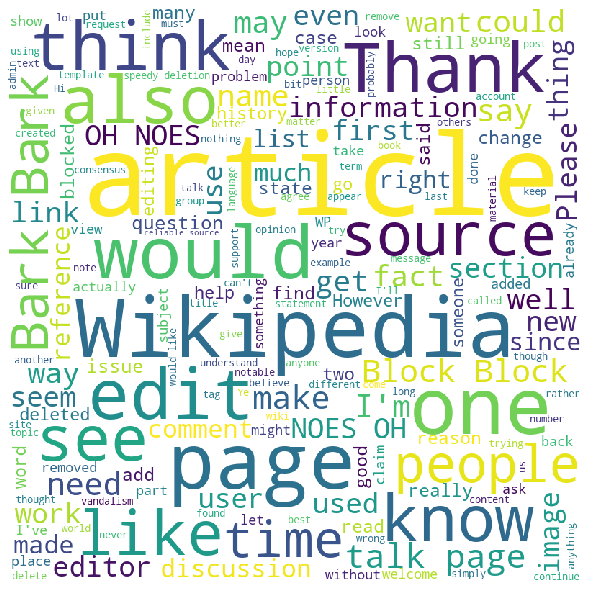

In [15]:
ntox_comm = tox_df_all[tox_df_all['toxicity'] == 0]['comment'].sample(frac = 1) 
all_comm_ntox = ''
for i in range(10000):
    all_comm_ntox += str(ntox_comm.iloc[i])
    
all_comm_ntox = all_comm_ntox.replace('NEWLINE_TOKEN', '')
stop_words = set(stopwords.words('english')) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_ntox) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Word Cloud analysis for Aggressive Speech

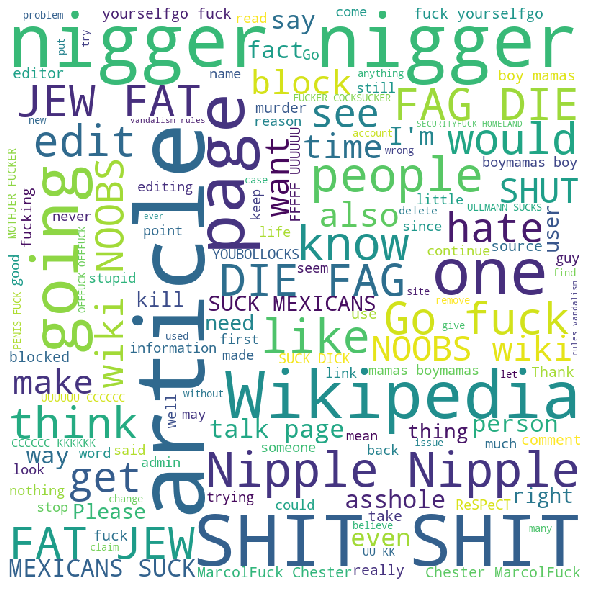

In [16]:
agg_comm = agg_df_all[agg_df_all['aggression'] == 1]['comment'].sample(frac = 1) 
all_comm_agg = ''
for i in range(10000):
    all_comm_agg += str(agg_comm.iloc[i])

all_comm_agg = all_comm_agg.replace('NEWLINE_TOKEN', '')

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_agg) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Word Cloud analysis for non-Aggressive Speech

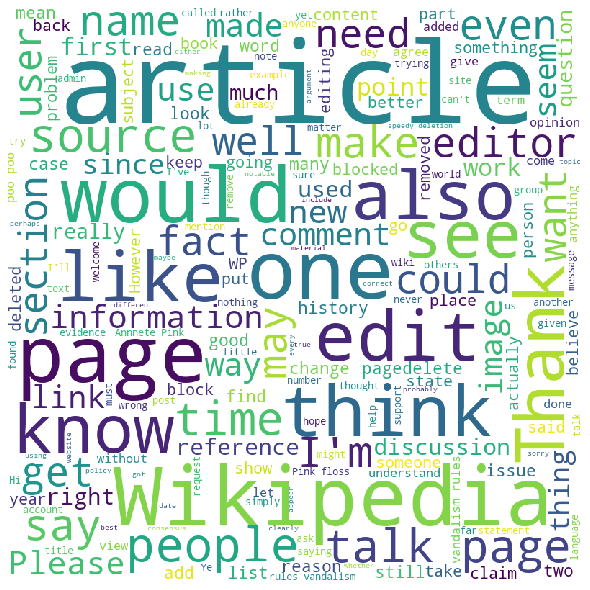

In [17]:
nagg_comm = agg_df_all[agg_df_all['aggression'] == 0]['comment'].sample(frac = 1) 
all_comm_nagg = ''
for i in range(10000):
    all_comm_nagg += str(nagg_comm.iloc[i])

all_comm_nagg = all_comm_nagg.replace('NEWLINE_TOKEN', '')

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_comm_nagg) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 